# Week 09 Root finding
Introduction to Numerical Problem Solving, Spring 2017   
Chanh Nguyen  
Helsinki Metropolia University of Applied Sciences

In [1]:
%pylab inline
from scipy.optimize import bisect, newton

Populating the interactive namespace from numpy and matplotlib


## Exercise 1
Draw graphical presentations of the following functions. Use subplots to divide the figure into four parts.

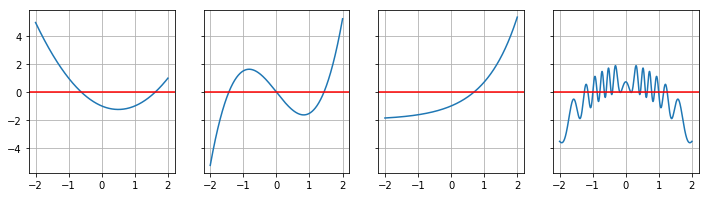

In [2]:
x = np.linspace(-2, 2, 1000)
def f1(x):
    return x**2 - x - 1
def f2(x):
    return x**3 - 3*sin(x)
def f3(x):
    return exp(x) - 2
def f4(x):
    return 1 - x**2 + sin(50/(1+x**2))

fig, axes = plt.subplots(1, 4, figsize=(12, 3), sharey=True)
 
for n, y in enumerate([f1(x), f2(x), f3(x), f4(x)]):
    axes[n].plot(x, y)
    axes[n].grid()
    axes[n].set_xticks([-2, -1, 0, 1, 2])
    axes[n].axhline(0, color = 'r')

## Exercise 2
Write a function for incremental search the root of a function.

In [194]:
def incrementSearch(f, a, b, dx):
    x0 = a
    n = 0
    while x0 < b:
        n = n + 1
        if (abs(f(x0))<10*dx):
            return x0, n
        x0 = x0 + dx
    return None, n

Test it for $f_n(x)$

In [195]:
incrementSearch(f1, -2, 2, 0.01)

(-0.6599999999999988, 135)

In [196]:
incrementSearch(f2, -2, 2, 0.01)

(-1.4499999999999995, 56)

In [197]:
incrementSearch(f3, -2, 2, 0.01)

(0.650000000000002, 266)

In [198]:
incrementSearch(f4, -2, 2, 0.01)

(-1.2499999999999993, 76)

## Exercise 3
Use `bisect()` function from `scipy.optimize` to find the roots.

In [199]:
# Find the first root of f1(x) between -2.0 and 0.0
x0, r = bisect(f1, -2.0, 0.0, xtol = 0.01, full_output = True)
print('x0, n =', (r.root, r.iterations))

x0, n = (-0.6171875, 8)


In [200]:
# Find the first root of f2(x) between -2.0 and -0.5
x0, r = bisect(f2, -2.0, -0.5, xtol = 0.01, full_output = True)
print('x0, n =', (r.root, r.iterations))

x0, n = (-1.443359375, 8)


In [201]:
# Find the first root of f3(x) between -2.0 and 2.0
x0, r = bisect(f3, -2.0, 2.0, xtol = 0.01, full_output = True)
print('x0, n =', (r.root, r.iterations))

x0, n = (0.6953125, 9)


In [202]:
# Find the first root of f4(x) between -2.0 and -1.25
x0, r = bisect(f4, -2.0, -1.25, xtol = 0.01, full_output = True)
print('x0, n =', (r.root, r.iterations))

x0, n = (-1.255859375, 7)


######  The iterations is much smaller by using bisection search than increment search

## Exercise 4
Write my own version of the bisection search method.

In [203]:
def bisectSearch(f, a, b, tol, maxiter):
    """ bisectSearc(f, a, b, tol, maxiter)
    My version of the bisectional root searching algorithm.
    Inputs:
       f = the function 
       a = lower limit of the domain
       b = upper limit of the domain
       tol = tolerance for the root value
       maxiter = maximum numbers of iterations
    Outputs:
       x0 = estimate for the root
       n = number of iterations
    """
    # Initial values
    x0, x1 = a, b
    f0, f1 = f(x0), f(x1)
    n = 0
    
    # Loop until max iterations
    while n < maxiter:
        n += 1
        xm = (x0 + x1)/2
        fm = f(xm)
        
        # Change the brackets
        if sign(fm) == sign(f0):
            x0, f0 = xm, fm
        else:
            x1, f1 = xm, fm
            
        # Stop criteria
        ea = abs(fm)
        if ea < tol:
            return xm, n
    # Returns the estimate for the root and the number of iterations
    return x0, n

In [204]:
# Find the first root of f1(x) between -2.0 and 0.0
x0, n = bisectSearch(f1, -2.0, 0.0, 0.01, 1000)
print('x0, n =', (x0, n))

x0, n = (-0.6171875, 8)


In [205]:
# Find the first root of f2(x) between -2.0 and -0.5
x0, n = bisectSearch(f2, -2.0, -0.5, 0.01, 1000)
print('x0, n =', (x0, n))

x0, n = (-1.4375, 3)


In [206]:
# Find the first root of f3(x) between -2.0 and 2.0
x0, n = bisectSearch(f3, -2.0, 2.0, 0.01, 1000)
print('x0, n =', (x0, n))

x0, n = (0.6953125, 9)


In [207]:
# Find the first root of f4(x) between -2.0 and -1.25
x0, n = bisectSearch(f4, -2.0, -1.25, 0.01, 1000)
print('x0, n =', (x0, n))

x0, n = (-1.2529296875, 8)


###### The result is similar with those obtained in problem 3. The iteration numbers are slightly different.